## Logistic Regression
* 선형 회귀 방식을 이용한 이진 분류 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 갖는 모델 필요
    * 가설 결과에 Sigmoid 함수 적용
* Logistic, sigmoid 함수
    * S자 모양의 함수
    * $\displaystyle s(z) = \frac{1}{1+e^{-z}}$
    * $z$ 값을 0과 1사이의 값으로 바꾸는 함수
    * Sigmoid 함수 원리
        * $\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.
        * 분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.
        * $e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다
        * 따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

* sklearn API
    * `sklearn.linear_model.LogisticRegression`

#### Sigmoid 함수 그리기

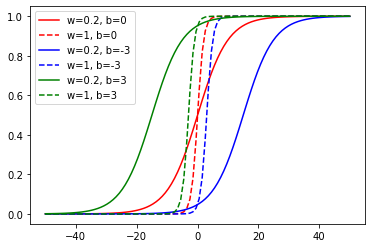

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return  1/(1+np.exp(-z))

def drawSigmoid(w=0.5, b=0, style='-', label=None, x=None):
    if x is None :
        x=np.linspace(-50,50,100).reshape(-1,1)
    else:
        x = np.linspace(np.min(x), np.max(x), 100).reshape(-1,1)
    
    y = sigmoid(x * w + b)
    plt.plot(x, y, style, label=label)
    
drawSigmoid(0.2,  0, 'r', label="w=0.2, b=0")
drawSigmoid(  1,  0, 'r--', label='w=1, b=0')

drawSigmoid(0.2, -3, 'b', label='w=0.2, b=-3')
drawSigmoid(  1, -3, 'b--', label='w=1, b=-3')

drawSigmoid(0.2,  3, 'g', label='w=0.2, b=3')
drawSigmoid(  1,  3, 'g--', label='w=1, b=3')
plt.legend()

#### 로지스틱 회귀 실습: 랜덤수 분류

(100,)


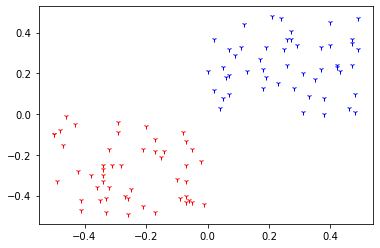

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma, 2))
Xb = np.random.randint(0,50, (mb, 2))
X = np.concatenate((Xa, Xb), axis=0).astype(np.float32)/100

y = np.zeros((m,), dtype=np.float32)
y[mb:] = 1

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

accuracy:1.0


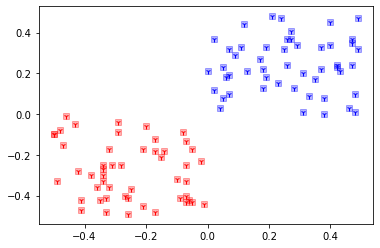

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X, y)
predict = lr_clf.predict(X)

print(f'accuracy:{accuracy_score(y, predict)}')

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

plt.plot(X[predict==0][:,0],X[predict==0][:,1], 'rs', alpha=0.3)
plt.plot(X[predict==1][:,0],X[predict==1][:,1], 'bs', alpha=0.3)

#### 로지스틱 회귀 실습: 위스콘신 유방암 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, cancer.target, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print(f'accuracy:{accuracy_score(y_test, pred)*100:.2f}%')

accuracy:96.50%
